In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import json 
import argparse 
import sys

In [3]:
from rmab.simulator import RMABSimulator, random_valid_transition, random_valid_transition_round_down, synthetic_transition_small_window
from rmab.uc_whittle import UCWhittle, UCWhittleFixed 
from rmab.ucw_value import UCWhittle_value
from rmab.baselines import optimal_policy, random_policy, WIQL
from rmab.fr_dynamics import get_all_transitions
from rmab.utils import get_save_path, delete_duplicate_results


In [4]:
is_jupyter = 'ipykernel' in sys.modules

In [5]:
if is_jupyter: 
    seed        = 42
    n_arms      = 8
    budget      = 3
    discount    = 0.9
    alpha       = 3 
    n_episodes  = 30
    episode_len = 20
    n_epochs    = 10
    save_name = 'hyperparameter'
    save_with_date = True 
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--n_arms',         '-N', help='num beneficiaries (arms)', type=int, default=8)
    parser.add_argument('--episode_len',    '-H', help='episode length', type=int, default=20)
    parser.add_argument('--n_episodes',     '-T', help='num episodes', type=int, default=30)
    parser.add_argument('--budget',         '-B', help='budget', type=int, default=3)
    parser.add_argument('--n_epochs',       '-E', help='number of epochs (num_repeats)', type=int, default=10)
    parser.add_argument('--discount',       '-d', help='discount factor', type=float, default=0.9)
    parser.add_argument('--alpha',          '-a', help='alpha: for conf radius', type=float, default=3)
    parser.add_argument('--seed',           '-s', help='random seed', type=int, default=42)
    parser.add_argument('--save_name',      '-n', help='save name', type=str, default='results')
    parser.add_argument('--use_date', action='store_true')

    args = parser.parse_args()

    n_arms      = args.n_arms
    budget      = args.budget
    discount    = args.discount
    alpha       = args.alpha 
    seed        = args.seed
    n_episodes  = args.n_episodes
    episode_len = args.episode_len
    n_epochs    = args.n_epochs
    save_name   = args.save_name 
    save_with_date = args.use_date 



In [6]:
n_states = 2
n_actions = 2

In [7]:
all_population_size = 100 # number of random arms to generate
all_transitions = random_valid_transition(all_population_size, n_states, n_actions)

In [8]:
all_transitions.shape

(100, 2, 2, 2)

In [9]:
all_features = np.arange(all_population_size)

In [10]:
np.random.seed(seed)
random.seed(seed)
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, episode_len, n_epochs, n_episodes, budget, number_states=n_states)

acting should always be good! 0.728 < 0.998
acting should always be good! 0.985 < 0.993
acting should always be good! 0.422 < 0.721
acting should always be good! 0.745 < 0.985
acting should always be good! 0.628 < 0.751
acting should always be good! 0.941 < 0.942
acting should always be good! 0.929 < 0.987
acting should always be good! 0.824 < 0.899
acting should always be good! 0.841 < 0.942
acting should always be good! 0.615 < 0.676
cohort [68 20 55 85 65 23 13 56]
cohort [12 67 23 46 61 17 33 95]
cohort [83 21 74 61 73 87 47 28]
cohort [81 96 33 20 55 79 12 14]
cohort [79 13 96 59  7 80 72 78]
cohort [58 24 12 57 17 87 91 56]
cohort [65 10 39 32 69 73 27 82]
cohort [60 47 62 69 33  2  5  7]
cohort [77 24 44 52 59 88 70  2]
cohort [ 6 70  5 86 13 64 16 67]
Last cohort [ 6 70  5 86 13 64 16 67]
Transitions [[[[4.30105477e-01 5.69894523e-01]
   [5.08182393e-02 9.49181761e-01]]

  [[2.06002715e-01 7.93997285e-01]
   [1.54027077e-02 9.84597292e-01]]]


 [[[4.16923490e-01 5.83076510e-01]

In [11]:
np.random.seed(seed)
random.seed(seed)
random_rewards = random_policy(simulator, n_episodes, n_epochs)

first state [0 0 0 1 1 0 1 0]
instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, state [1 0 1 1 1 0 1 0]
instance 0, ep 15, state [0 1 1 0 1 0 0 0]
instance 0, ep 16, state [0 1 0 1 0 0 0 1]
instance 0, ep 17, state [1 1 0 1 1 1 0 0]
instance 0, ep 18, state [0 0 0 0 1 0 1 0]
instance 0, ep 19, state [0 0 1 1 0 1 0 0]
instance 0, ep 20, state [1 0 0 0 1 0 0 1]
instance 0, ep 21, state [1 1 1 0 0 1 0 1]
instance 0, ep 22, state [0 0 0 0 1 0 0 0]
instance 0, ep 23, state [0 0 1 0

In [12]:
np.random.seed(seed)
random.seed(seed)
optimal_reward = optimal_policy(simulator, n_episodes, n_epochs, discount)

first state [0 0 0 1 1 0 1 0]
   state [0 0 0 1 1 0 1 0] state_WI [  0.3    1.     0.26   0.27 -10.     0.57 -10.   -10.  ] sorted [1 5 0]


   state [1 1 0 0 1 0 1 0] state_WI [  0.27   0.04   0.26   0.57 -10.     0.57 -10.   -10.  ] sorted [5 3 0]
   state [1 1 0 1 1 1 1 1] state_WI [  0.27   0.04   0.26   0.27 -10.     0.6  -10.   -10.  ] sorted [5 0 3]
   state [1 1 0 1 1 1 0 1] state_WI [  0.27   0.04   0.26   0.27 -10.     0.6    0.28 -10.  ] sorted [5 6 0]
   state [1 1 0 0 0 1 0 1] state_WI [  0.27   0.04   0.26   0.57   0.41   0.6    0.28 -10.  ] sorted [5 3 4]
   state [1 1 1 1 0 1 0 1] state_WI [  0.27   0.04   0.19   0.27   0.41   0.6    0.28 -10.  ] sorted [5 4 6]
   state [1 1 1 0 0 1 1 0] state_WI [  0.27   0.04   0.19   0.57   0.41   0.6  -10.   -10.  ] sorted [5 3 4]
   state [0 1 0 1 0 1 0 1] state_WI [  0.3    0.04   0.26   0.27   0.41   0.6    0.28 -10.  ] sorted [5 4 0]
   state [0 1 0 1 1 1 0 0] state_WI [  0.3    0.04   0.26   0.27 -10.     0.6    0.28 -10.  ] sorted [5 0 6]
   state [1 1 0 1 0 1 0 1] state_WI [  0.27   0.04   0.26   0.27   0.41   0.6    0.28 -10.  ] sorted [5 4 6]
   state [0 1 0 1 0

In [13]:
np.random.seed(seed)
random.seed(seed)
wiql_rewards = WIQL(simulator, n_episodes, n_epochs)

first state [0 0 0 1 1 0 1 0]
instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, state [1 0 1 1 1 0 1 0]
instance 0, ep 15, state [0 1 1 0 1 0 0 0]
instance 0, ep 16, state [0 1 0 1 0 0 0 1]
instance 0, ep 17, state [1 1 0 1 1 1 0 0]
instance 0, ep 18, state [0 0 0 0 1 0 1 0]
instance 0, ep 19, state [0 0 1 1 0 1 0 0]
instance 0, ep 20, state [1 0 0 0 1 0 0 1]
instance 0, ep 21, state [1 1 1 0 0 1 0 1]
instance 0, ep 22, state [0 0 0 0 1 0 0 0]
instance 0, ep 23, state [0 0 1 0

In [14]:
np.random.seed(seed)
random.seed(seed)
ucw_extreme_rewards = UCWhittle(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='extreme')

solving UCWhittle using method: extreme
first state [0 0 0 1 1 0 1 0]


instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
---------------------------------------------------
0 100  | a  [1 0 0 1 0 0 1 0]  | s'  [1 0 0 1 0 0 0 1]  | r  3    | WI  [0.9   0.898 0.898 0.9   0.898 0.899 0.931 0.898]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
---------------------------------------------------
0 200  | a  [0 0 1 1 1 0 0 0]  | s'  [1 0 0 1 1 0 1 1]  | r  5    | WI  [  0.813   0.898   0.898   0.9     0.9   -10.    -10.    -10.   ]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, state [1 0 1 1 1 0 1 0]
instance 0, ep 15, state [0 1 1 0 1 0 0 0]


In [15]:
np.random.seed(seed)
random.seed(seed)
ucw_value_rewards = UCWhittle_value(simulator, n_episodes, n_epochs, discount, alpha=alpha)

solving UCWhittle using method: VALUE-BASED
first state [0 0 0 1 1 0 1 0]
--------------------------
Restricted license - for non-production use only - expires 2024-10-28


/usr0/home/naveenr/food_rescue_rmab/rmab/ucw_value.py:246: UserWarning: Uh oh! Model is not optimal; status is 11
  warnings.warn(f'Uh oh! Model is not optimal; status is {model.status}')


      arm 0 state 0, opt val 7.21, opt p [0.576 0.576 0.889 0.889]
      arm 0 state 1, opt val 8.85, opt p [0.407 0.407 0.932 0.932]
      arm 1 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 1 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 2 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 2 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 3 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 3 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 4 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 4 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 5 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 5 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 6 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 6 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
      arm 7 state 0, opt val 7.21, opt p [0. 0. 0. 0.]
      arm 7 state 1, opt val 8.85, opt p [0. 0. 0. 0.]
--------------------------
      arm 0 state 0, opt val 0.00, opt p [-0. -0. -0.  0.]
      arm 

/usr0/home/naveenr/food_rescue_rmab/rmab/ucw_value.py:246: UserWarning: Uh oh! Model is not optimal; status is 7
  warnings.warn(f'Uh oh! Model is not optimal; status is {model.status}')


      arm 5 state 1, opt val 1.93, opt p [0.103 0.103 0.104 0.104]
      arm 6 state 0, opt val 0.46, opt p [0.051 0.051 0.057 0.057]
      arm 6 state 1, opt val 1.47, opt p [0.051 0.051 0.057 0.057]
      arm 7 state 0, opt val 0.00, opt p [0. 0. 0. 0.]
      arm 7 state 1, opt val 1.00, opt p [0. 0. 0. 0.]
--------------------------
      arm 0 state 0, opt val 0.00, opt p [0. 0. 0. 0.]
      arm 0 state 1, opt val 1.00, opt p [0. 0. 0. 0.]
      arm 1 state 0, opt val 0.00, opt p [0. 0. 0. 0.]
      arm 1 state 1, opt val 1.00, opt p [0. 0. 0. 0.]
      arm 2 state 0, opt val 0.00, opt p [0. 0. 0. 0.]
      arm 2 state 1, opt val 1.00, opt p [0. 0. 0. 0.]
      arm 3 state 0, opt val 0.00, opt p [0. 0. 0. 0.]
      arm 3 state 1, opt val 1.00, opt p [0. 0. 0. 0.]
      arm 4 state 0, opt val 0.00, opt p [-0. -0. -0.  0.]
      arm 4 state 1, opt val 1.00, opt p [-0. -0. -0.  0.]
can't get subsidy value. model status is 7
  state 0, lcb = [ 0.101 -0.     0.101 -0.   ], ucb = [1. 1. 

KeyboardInterrupt: 

In [16]:
np.random.seed(seed)
random.seed(seed)
ucw_ucb_rewards = UCWhittle(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='UCB')

solving UCWhittle using method: UCB
first state [0 0 0 1 1 0 1 0]
instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
---------------------------------------------------
0 100  | a  [0 1 0 0 0 0 1 1]  | s'  [0 1 0 0 0 1 1 1]  | r  4    | WI  [-0.     0.004 -0.    -0.    -0.    -0.    -0.    -0.   ]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
---------------------------------------------------
0 200  | a  [0 1 1 0 1 0 0 0]  | s'  [0 1 0 1 0 0 1 1]  | r  4    | WI  [-0.     0.078  0.133 -0.     0.062 -0.    -0.    -0.   ]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, s

In [17]:
np.random.seed(seed)
random.seed(seed)
ucw_qp_rewards = UCWhittle(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='QP')

solving UCWhittle using method: QP
first state [0 0 0 1 1 0 1 0]


/usr0/home/naveenr/food_rescue_rmab/rmab/uc_whittle.py:394: UserWarning: Uh oh! Model is not optimal; status is 11
  warnings.warn(f'Uh oh! Model is not optimal; status is {model.status}')


instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
---------------------------------------------------
0 100  | a  [0 0 0 0 0 1 1 1]  | s'  [0 1 0 1 0 1 1 1]  | r  5    | WI  [-1. -1. -1. -1. -1. -1. -1. -1.]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
---------------------------------------------------
0 200  | a  [0 0 0 0 0 1 1 1]  | s'  [0 0 0 0 0 1 1 1]  | r  3    | WI  [-1. -1. -1. -1. -1. -1. -1. -1.]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, state [1 0 1 1 1 0 1 0]
instance 0, ep 15, state [0 1 1 0 1 0 0 0]
------------------------------------------------

In [18]:
np.random.seed(seed)
random.seed(seed)
ucw_ucb_rewards_fixed = UCWhittleFixed(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='UCB')

solving UCWhittle using method: UCB
first state [0 0 0 1 1 0 1 0]
instance 0, ep 1, state [0 0 0 1 1 1 1 1]
instance 0, ep 2, state [0 0 0 0 0 0 0 0]
instance 0, ep 3, state [0 0 0 1 1 0 0 0]
instance 0, ep 4, state [0 1 0 0 1 0 0 1]
instance 0, ep 5, state [0 0 0 0 1 1 1 0]
---------------------------------------------------
0 100  | a  [0 0 1 0 1 0 0 1]  | s'  [1 1 1 0 0 1 0 1]  | r  5    | WI  [-0.    -0.     0.003 -0.     0.006 -0.    -0.    -0.   ]
instance 0, ep 6, state [1 0 0 1 0 0 1 0]
instance 0, ep 7, state [1 0 0 0 0 1 1 1]
instance 0, ep 8, state [1 1 0 1 0 1 0 1]
instance 0, ep 9, state [1 1 1 0 1 1 0 0]
instance 0, ep 10, state [0 0 0 0 0 1 0 0]
---------------------------------------------------
0 200  | a  [0 0 1 0 0 0 1 1]  | s'  [1 1 0 1 1 1 1 1]  | r  7    | WI  [-0.    -0.     0.003 -0.    -0.    -0.    -0.    -0.   ]
instance 0, ep 11, state [1 1 1 1 0 1 0 0]
instance 0, ep 12, state [0 1 0 1 0 0 1 1]
instance 0, ep 13, state [1 1 0 1 0 0 1 0]
instance 0, ep 14, s

In [19]:
x_vals = np.arange(n_episodes * episode_len + 1)

In [20]:
def get_cum_sum(reward):
        cum_sum = reward.cumsum(axis=1).mean(axis=0)
        cum_sum = cum_sum / (x_vals + 1)
        return smooth(cum_sum)
def smooth(rewards, weight=0.7):
    """ smoothed exponential moving average """
    prev = rewards[0]
    smoothed = np.zeros(len(rewards))
    for i, val in enumerate(rewards):
        smoothed_val = prev * weight + (1 - weight) * val
        smoothed[i] = smoothed_val
        prev = smoothed_val

    return smoothed

In [56]:
use_algos = ['optimal', 'ucw_ucb', 'ucw_qp', 'ucw_extreme', 'wiql', 'random', 'fixed']
rewards = {
    'optimal': optimal_reward,
    'ucw_qp': ucw_qp_rewards, 
    'ucw_extreme': ucw_extreme_rewards, 
    'wiql': wiql_rewards, 
    'random': random_rewards, 
    'fixed': ucw_ucb_rewards_fixed,  
    'ucw_ucb': ucw_ucb_rewards, 
}
colors = {'optimal': 'purple', 'ucw_value': 'b', 'ucw_qp': 'c', 'ucw_qp_min': 'goldenrod', 'ucw_ucb': 'darkorange',
                'ucw_extreme': 'r', 'wiql': 'limegreen', 'random': 'brown', 'fixed': 'goldenrod'}

In [57]:
cum_sum_by_algo = {}
for algo in use_algos:
    cum_sum_by_algo[algo] = get_cum_sum(rewards[algo])

mean_by_algo = {}
for algo in use_algos: 
    mean_by_algo[algo] = rewards[algo].mean(axis=0)

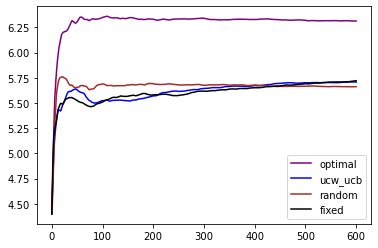

In [58]:
for algo in use_algos:
    plt.plot(x_vals, get_cum_sum(rewards[algo]), c=colors[algo], label=algo)
plt.legend()

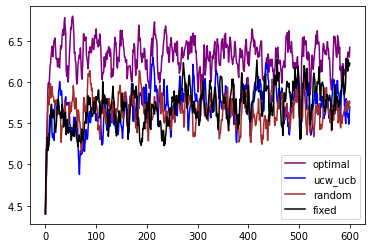

In [59]:
for algo in use_algos:
    plt.plot(x_vals, smooth(rewards[algo].mean(axis=0)), c=colors[algo], label=algo)
plt.legend()

In [50]:
for i in cum_sum_by_algo:
    cum_sum_by_algo[i] = cum_sum_by_algo[i].tolist() 
    mean_by_algo[i] = mean_by_algo[i].tolist() 

In [51]:
data = {
    'cum_sum': cum_sum_by_algo,
    'mean_rewards': mean_by_algo,  
    'parameters': 
    {'seed'      : seed,
    'n_arms'    : n_arms,
    'budget'    : budget,
    'discount'  : discount, 
    'alpha'     : alpha, 
    'n_episodes': n_episodes, 
    'episode_len': episode_len, 
    'n_epochs'  : n_epochs} 
}

In [52]:
save_path = get_save_path('replication',save_name,seed,use_date=False)

In [53]:
delete_duplicate_results('replication',save_name,data)

In [54]:
json.dump(data,open('../results/'+save_path,'w'))